Qn.4 Based on the information given in the dataset, predict crop production for the next year
using Machine Learning technique.
Data: crop_production.csv

Ans: According to the question, I have to find the target values of the next year which means perform time series analysis but
In our dataset, features name  as Crop_Year is not in regular shape thus I solved this problem by using different regression model to predict the crop production

In [1]:
#Here I have imported libraries which are used for importing dataset and doing visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Inorder to ignore warning here I have import warnings libary and I have also intialized set_option method so that it makes easy
# to view our dataset
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import crop_production from outside directory
df=pd.read_csv("crop_production.csv")

In [4]:
# Viewing top 10 rows of dataframe called df 
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [5]:
# info() function providing information about the df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
# Below I am checking the description about the dataframe name as df using describe() method
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


<h1 style="color:green; fontsize:20px; text-align:center">EDA of Numerical and Categorical Values <h1>

In [7]:
# Checking whether our dataset contains null value or not using isnull()function and Production contains 3730 null values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<AxesSubplot:>

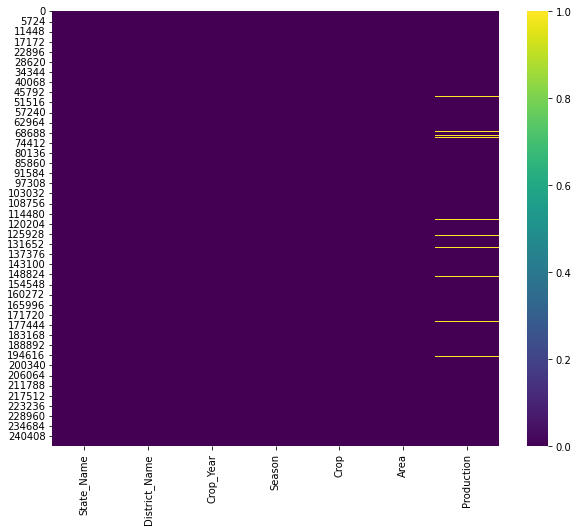

In [8]:
# Using heatmap of seaborn to identify to which features contains null value and We can see easily that target value known as
# Prouduction contains null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')

In [9]:
# It is not good idea to fill the target value with mean or median so it is better to drop them
df.dropna(inplace=True)

In [10]:
#Again checking whether the dataset have null values or not
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

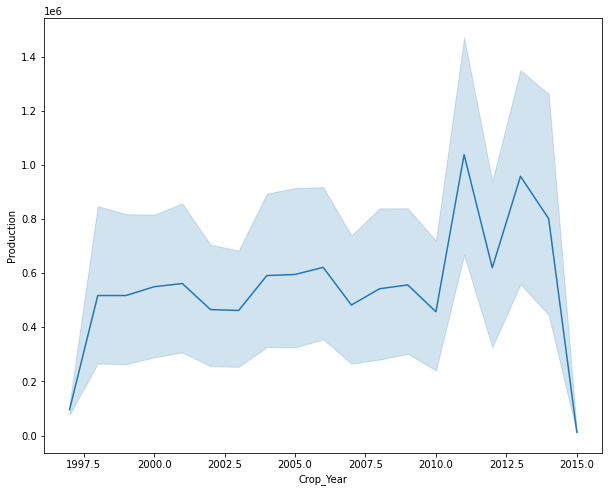

In [11]:
#Using lineplot I am showing here how target values are react accorinding to the years
plt.figure(figsize=(10,8))
sns.lineplot(df['Crop_Year'],df['Production'])

In [12]:
# Here I am couting that number of state_name
df['State_Name'].value_counts()[:10]

Uttar Pradesh     33189
Madhya Pradesh    22604
Karnataka         21079
Bihar             18874
Assam             14622
Odisha            13524
Tamil Nadu        13266
Maharashtra       12496
Rajasthan         12066
Chhattisgarh      10368
Name: State_Name, dtype: int64

In [13]:
# Season feature has the 6 different values which are shown using pandas's unique function 

df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

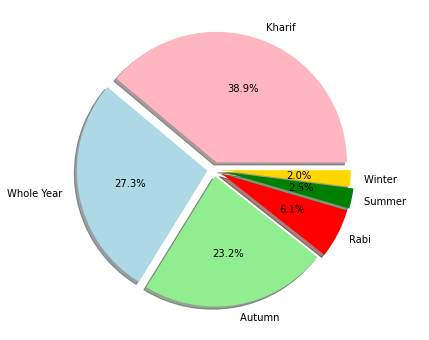

In [14]:
# Here I have drawn piechart which shows how the value of seasons are distrubuted in dataset

plt.figure(figsize = (6,6))
segment = df['Season'].value_counts()
segment_label = df['Season'].unique()
color = ('LightPink', "LightBlue" , 'LightGreen','red','green','Gold')

plt.pie(segment,
       autopct = '%1.1f%%',
       labels = segment_label,
       explode = (0.06,0.05,0.05,0.07,0.08,0.05),
       shadow = True,
       colors = color);

#or use 
# df.groupby('Season', axis=0).agg({"Production":np.sum})

<AxesSubplot:xlabel='Crop_Year', ylabel='count'>

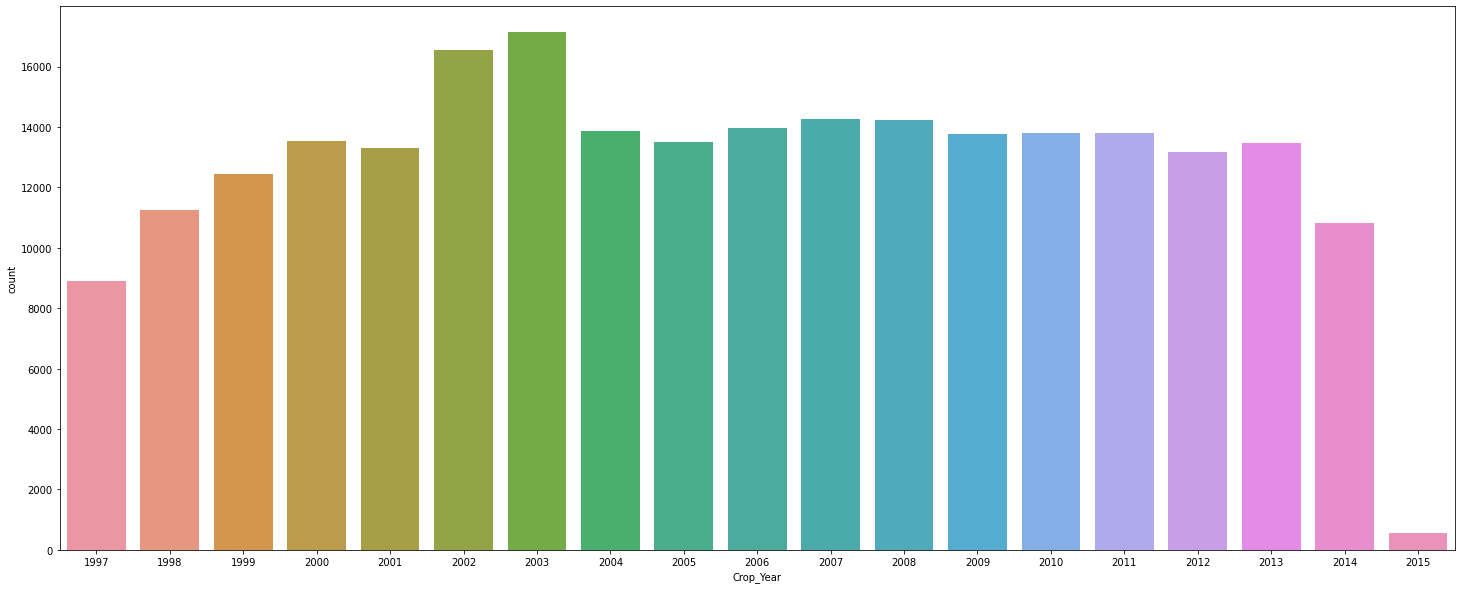

In [15]:
# couting the frequency of each year using countplot function

plt.figure(figsize=(25,10))
sns.countplot(df['Crop_Year'])

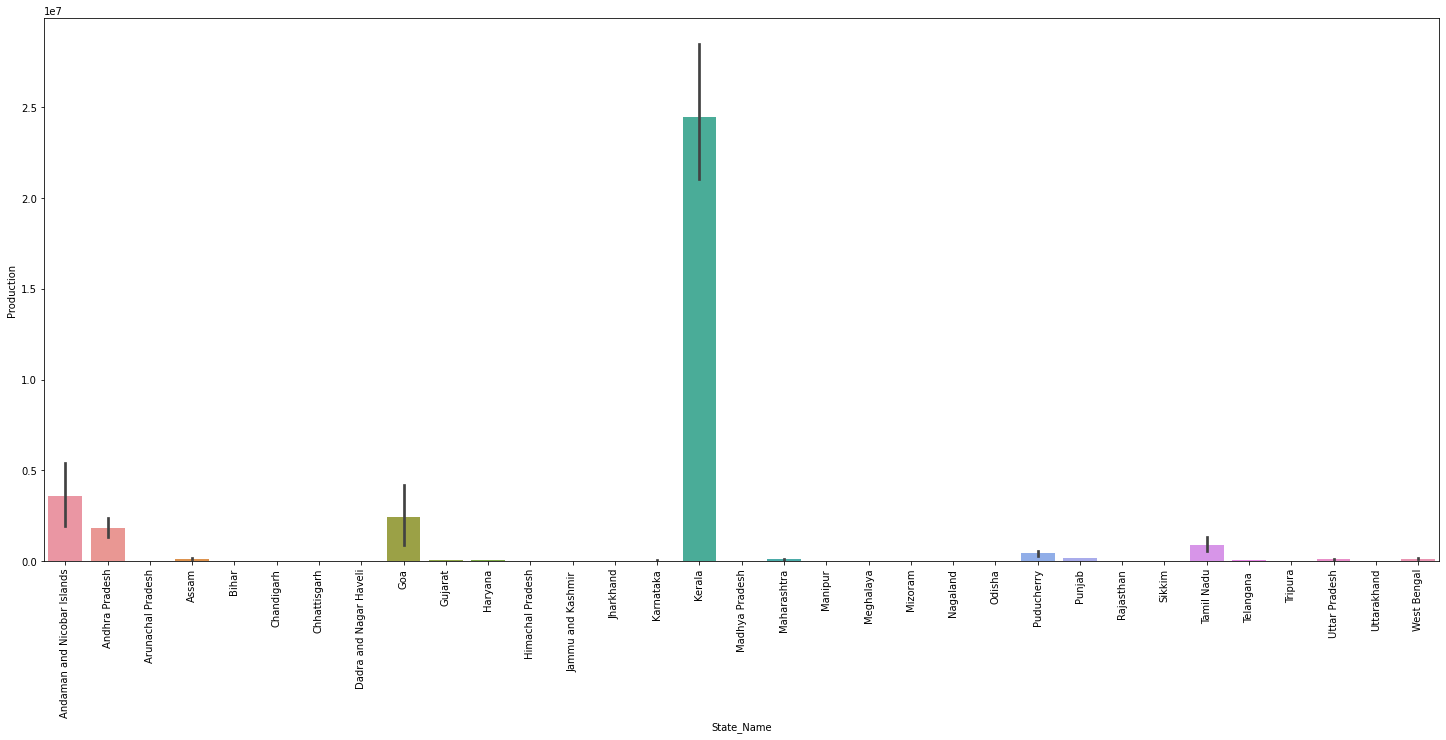

In [16]:
#The barchart is showing the contribution of each state towards the production

plt.figure(figsize=(25,10))
sns.barplot(df['State_Name'],df['Production'])
plt.xticks(rotation=90);
# df.groupby('State_Name', axis=0).agg({"Production":np.sum})

<AxesSubplot:xlabel='Area', ylabel='Production'>

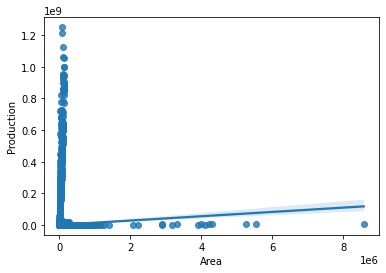

In [17]:
#regplot is defining the correlation between area and production

sns.regplot(df['Area'],df['Production'])

<AxesSubplot:xlabel='Crop_Year', ylabel='count'>

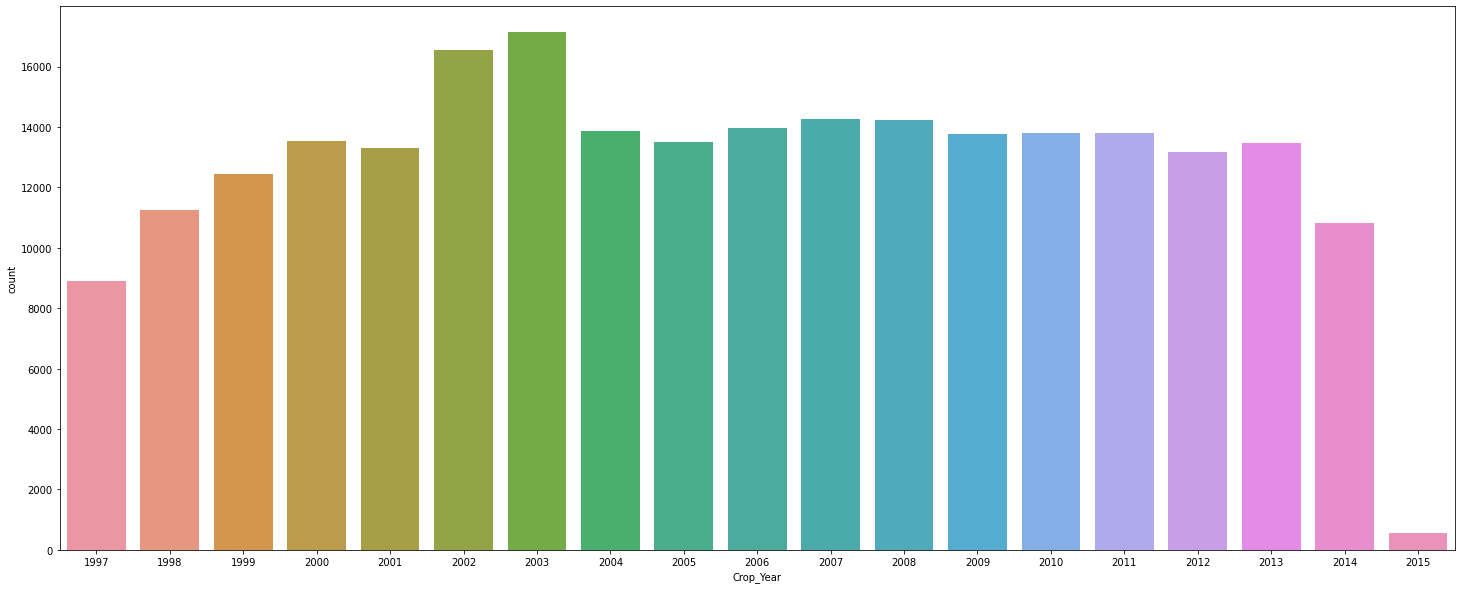

In [18]:
#counting the frequency of year using countplot
plt.figure(figsize=(25,10))
sns.countplot(df['Crop_Year'])

<AxesSubplot:xlabel='Area'>

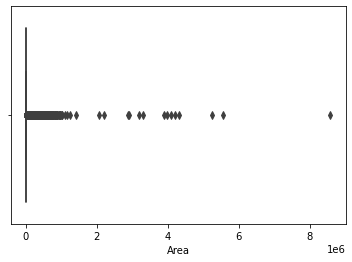

In [19]:
# checking outlier in our feature name as Area
sns.boxplot(df['Area'])

In [20]:
#Detect outlier using inter quartile range and change the feature of numerical dataset
q1=df['Area'].quantile(0.25)
q3=df['Area'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
df['Area']=np.where(df['Area']> upper_bound,upper_bound,np.where(df['Area']<lower_bound,lower_bound,df['Area']))


<AxesSubplot:xlabel='Area'>

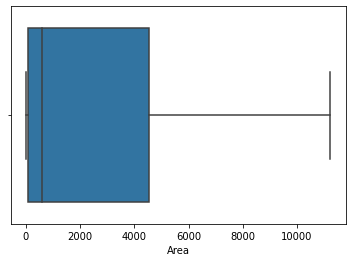

In [21]:
# Here outlier has removed which is again visualized by boxplot
sns.boxplot(df['Area'])

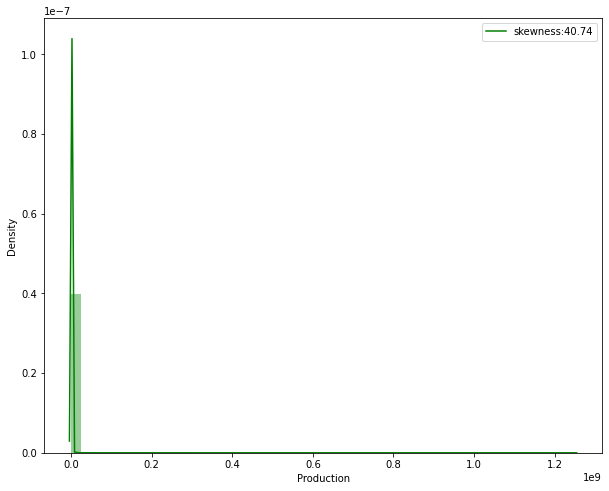

In [22]:
# lets check how much our target data has skewness and we can see that there is 40.47 skewneww which is really disaster for our
# output

plt.figure(figsize=(10,8))
sns.distplot(df["Production"], color="green");
plt.legend(["skewness:{:.2f}".format(df["Production"].skew())])

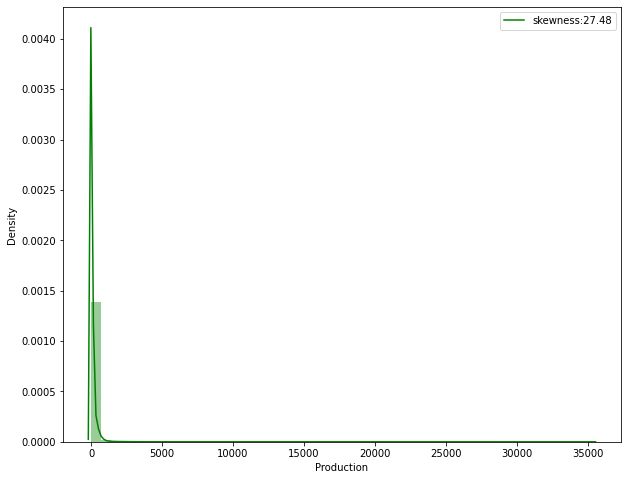

In [23]:
#lets reduce the right skewness of the target values using square root
df['Production']=np.sqrt(df['Production'])
plt.figure(figsize=(10,8))
sns.distplot(df["Production"], color="green");
plt.legend(["skewness:{:.2f}".format(df["Production"].skew())])

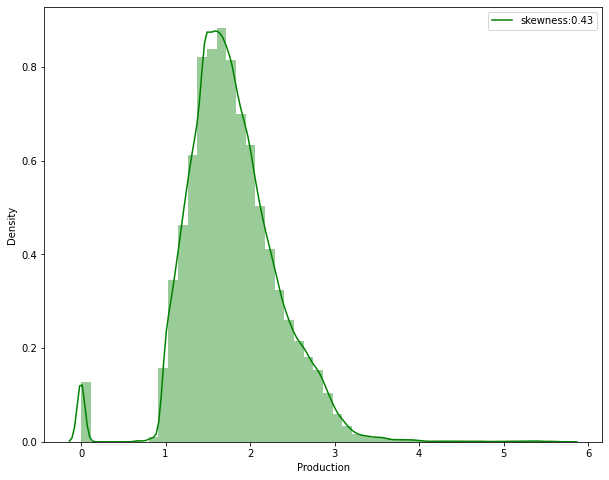

In [24]:
# Above we have seen less change in target value but our data must be between -1 to 1 so that we can say our data is symmetric
#after applying again cube root and square root we got 0.43 skewness which is really good values
df['Production']=np.cbrt(np.sqrt(df['Production']))
plt.figure(figsize=(10,8))
sns.distplot(df["Production"], color="green");
plt.legend(["skewness:{:.2f}".format(df["Production"].skew())])

In [25]:
#lets see our categorical values in our dataset
categorical_values=df.select_dtypes(include="object")

In [26]:
# checking different unique values of categorical features
for col in df.columns:
    if col in df.select_dtypes(include="object") :
        print("Column Name:", col)
        print('')
        print(df[col].unique())
        print('\n')

Column Name: State_Name

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


Column Name: District_Name

['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CA

In [27]:
# Counting the categorical values of each featues
for col in df.select_dtypes(include="object"):
    print(df[col].value_counts())

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [28]:
#Dropping the features known as Crop_Year and District_Name which is not that much important for designing model
df=df.drop(['Crop_Year','District_Name'], axis=1)

In [29]:
# Now change the categorical values to integer number using pandas's get_dummies function 

df1=pd.get_dummies(data=df)

In [30]:
df1.head(5)

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Apple,Crop_Arcanut (Processed),Crop_Arecanut,Crop_Arhar/Tur,Crop_Ash Gourd,Crop_Atcanut (Raw),Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Bean,Crop_Beans & Mutter(Vegetable),Crop_Beet Root,Crop_Ber,Crop_Bhindi,Crop_Bitter Gourd,Crop_Black pepper,Crop_Blackgram,Crop_Bottle Gourd,Crop_Brinjal,Crop_Cabbage,Crop_Cardamom,Crop_Carrot,Crop_Cashewnut,Crop_Cashewnut Processed,Crop_Cashewnut Raw,Crop_Castor seed,Crop_Cauliflower,Crop_Citrus Fruit,Crop_Coconut,Crop_Coffee,Crop_Colocosia,Crop_Cond-spcs other,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Cucumber,Crop_Drum Stick,Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Grapes,Crop_Groundnut,Crop_Guar seed,Crop_Horse-gram,Crop_Jack Fruit,Crop_Jobster,Crop_Jowar,Crop_Jute,Crop_Jute & mesta,Crop_Kapas,Crop_Khesari,Crop_Korra,Crop_Lab-Lab,Crop_Lemon,Crop_Lentil,Crop_Linseed,Crop_Litchi,Crop_Maize,Crop_Mango,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Cereals & Millets,Crop_Other Citrus Fruit,Crop_Other Dry Fruit,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Other Vegetables,Crop_Paddy,Crop_Papaya,Crop_Peach,Crop_Pear,Crop_Peas (vegetable),Crop_Peas & beans (Pulses),Crop_Perilla,Crop_Pineapple,Crop_Plums,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Pump Kin,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,1.884021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.0,1.617616,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.0,1.713582,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
# Scaling the value of Area inorder from 0 to 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Area']=scaler.fit_transform(df1[['Area']])

In [32]:
# Now split our independent and dependent features and name them as X and y 
y=df1['Production']
X=df1.drop('Production', axis=1)

In [33]:
# Checking the dimension of the independent feature so that will not give dimension problem in the future
y.shape

(242361,)

In [34]:
#Cheking the dimension of the dependent features
X.shape

(242361, 164)

# <h1 style="color:green; font-weight:bold; font-size:30px; text-align:center">Model Designing</h1>

In [35]:
#Appling cross validation to our dataset and diving the dataset in the ratio of 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
#Here, I am first checking simple and sweet algorithm in machine learning called linearregression which works as y=mx+c

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("r squared is: ", r2_score(y_test,y_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean square error is:  ", mean_squared_error(y_test,y_pred))

r squared is:  0.7521495953195335
root mean squared error 0.27213659854474226
Mean square error is:   0.07405832826750221


In [37]:
#Here, I am using gradientboosting alogrithm which is a regularization method to reduce cost function and also use for
# large dataset

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r squared",r2_score(y_test,y_pred))

mean squared error 0.044624112935972175
root mean squared error 0.2112442021357561
r squared 0.8506568442952436


In [38]:
# In this cell, I am using one of the power algorithm in machine known as eXtreme gradient boosting, which is used for
#large and complicated dataset and faster than any other algorithm

from xgboost import XGBRegressor
xgb=XGBRegressor(objective="reg:squarederror")
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r squared",r2_score(y_test,y_pred))

mean squared error 0.02030077360400861
root mean squared error 0.1424807832797413
r squared 0.9320595661448656


In [39]:
# Here, I have used RandomSearchCV inoder to find the best parameter in our model and it randomly selected best parameter 
# so it is faster than GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
xgb1=XGBRegressor(objective="reg:squarederror")
parameters={"max_depth":[int(x) for x in range(5,11)],
             "learning_rate":[0.05,0.10,0.15,0.20],
             "min_child_weight":[1,3,5],
             "gamma":[0,0.1,0.2,0.3,],
            }
rmsv=RandomizedSearchCV(xgb1, param_distributions=parameters,n_iter=5, cv=10,n_jobs=-1, verbose=1)
rmsv.fit(X_train,y_train)
y_pred=rmsv.predict(X_test)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r squared",r2_score(y_test,y_pred))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
mean squared error 0.021499719691614804
root mean squared error 0.14662782713937625
r squared 0.9280470630279993


In [40]:
rmsv.best_params_

{'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1}

From above 4 different models eXtreme gradient boost known as xgb has given a low cost function and higher R squared value, which is best for deploypment 